# Tutorial 3
## Outline
* Numba
* Neural network in matrix notation
* Back propagation
* Activation functions
* Q&A on HW#2


## Numba and Code Acceleration

Numba will pre-compile code so that it can be executed more efficiently.<br>
[Numba documentation](http://numba.pydata.org/numba-doc/latest/user/index.html)

In [2]:
import numba
import numpy as np


In [3]:
# @numba.jit(nopython=True)
def test():
    i=0
    for a in range(100000):
        i+=a
    return i

%timeit test()

6.86 ms ± 608 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
@numba.jit(nopython=True)
def test():
    i=0
    for a in range(100000):
        i+=a
    return i

%timeit test()

The slowest run took 24.55 times longer than the fastest. This could mean that an intermediate result is being cached.
745 ns ± 1.28 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
# @timeit numba.jit(test(), nopython=True)

In [8]:
def test():
    return np.sum(np.arange(1, 100000))

%timeit test()

144 µs ± 8.02 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [7]:
@numba.jit(nopython=True)
def test():
    return np.sum(np.arange(1, 100000))

%timeit test()

81.4 µs ± 23.9 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Neural network in matrix notation
![Neural network](http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/img/example_network.svg) <br>



Current layer value will be previous layer's values times the weight:
$$h_0^1 = \sum_{i=0}^{n^0} w_{i0}^0 h_i^0$$
$$h_j^l = \sum_{i=0}^{n^l-1} w_{ij}^{l-1} h_i^j$$
$$a_j^l = \sigma(\sum_{i=0}^{n^l-1} w_{ij}^{l-1} h_i^j)$$     activation function applied
$$h^l = h^{l-1}W^{l-1} + b$$ b is bias. Bias can help move the NN network space around.


### Back propagation formula
The four equations for doing back propagation:

Find the arrow (back propagation): $$\begin{eqnarray}\delta^L&=&\nabla_aC\odot\sigma'(z^L) \\
\delta^l&=&((w^{l+1})^T\delta^{l+1})\odot\sigma'(z^l) \\ \frac{\partial C}{\partial b_j^l}&=&\delta_j^l \\
\frac{\partial C}{\partial w_{jk}^l}&=&a_k^{l-1}\delta_j^l
\end{eqnarray}$$

$\sigma$ is the gradient, $\sigma'$ is the derivative of the gradient

Credit: [Neural Networks and Deep Learning, Ch. 2](http://neuralnetworksanddeeplearning.com/chap2.html)

In [ ]:
[3, 4, 2]
class NN():
    def __init__(self, architecture, learning_rate, activation):
        # initialize the model
        self.arch = architecture
        self.activation = activation
        self.learning_rate = learning_rate
        self.depth = len(self.arch)
        
    def init_weight(self):
        self.weights = []     # list of matrices for each layer
        self.biases = []      # list of derivatives
        for l in range(self.depth - 1):
            prev_layer_num = self.arch[l]
            current_layer_num = self.arch[l+1]
            # need to replace zeros with randomized matrix of size (prev_layer_num, current_layer_num)
            self.weights.append(np.zeros((current_layer_num, prev_layer_num)))    # HW update
            self.biases.append(np.zeros(current_layer_num))
            
    def feed_forward(self, x):
        self.z_s = []
        self.a_s = [x]
        for i in range(self.depth - 1):
            z_l = self.weights[l].dot(self.a_s[-1]) + self.biases[l]
            a_l = self.activation(z_l)
            self.z_s.append(z_l)      # list of numpy arrays
            self.a_s.append(a_l)
        return self.a_s[-1]
    
    def calc_error(self, y, activation_grad):
        self.errors = []
        
    def calc_grad(self, )                                # HW update
    
    def back_prop(self):
        for l in range(self.depth):
            self.weights[l] = self.weights[l] - self.learning_rate * self.weights_grad[l]       # HW update
            self.biases[l] = self.biases[l] - self.learning_rate * self.biases_grad[l]
            
    def fit(self, x, y, activation_grad):                  # Iterate the NN 
        self.feed_forward(x)
        self.calc_error(y, activation_grad)                # HW udpate
        self.calc_grad()
        self.back_prop
    
    def predict(self, x):
        return self.feed_forward(x)

In [ ]:
np.random.seed(0)
nn = NN([6, 2, 2], activation = tanh)
nn.init_weights()
print("Initialized prediction:", nn.predict([]))
nn.fit(x, y, tanh_grad)
print("Error in nodes", nn.errors)
print("Prediction after fitting once: ", nn.predict(x))

## Activation functions
### Linear
$y=x$
<br>$y'=1$ <br>

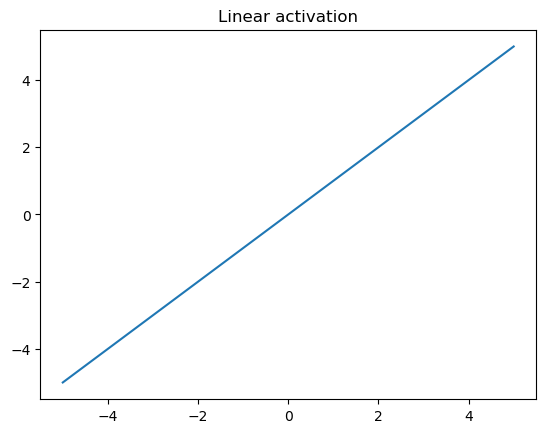

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
x=np.linspace(-5,5,2000)
y=x
plt.plot(x,y)
plt.title("Linear activation");

### tanh
$y=\tanh(x)$
<br>$y\in(-1,1)$
<br>$y'=1-y^2$



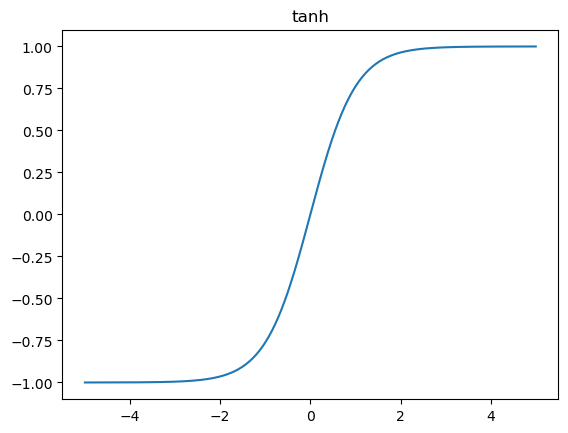

In [10]:
x=np.linspace(-5,5,2000)
y=np.tanh(x)
plt.plot(x,y)
plt.title("tanh");

In [13]:
def tanh_grad(x):
    return 1 - np.tanh(x)^2

### sigmoid
$y={\displaystyle \frac{1}{1+e^{-x}} }$
<br><br>$y\in(0,1)$
<br>$y'=y(1-y)$<br>

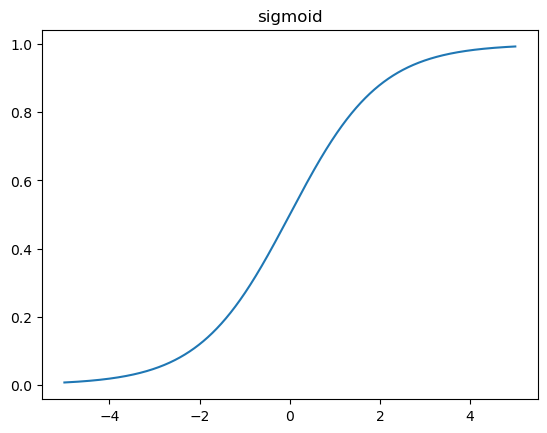

In [11]:
x=np.linspace(-5,5,2000)
y=1/(1+np.exp(-x))
plt.plot(x,y)
plt.title("sigmoid");

### ReLU
$y={\displaystyle \begin{equation}
\begin{cases} &x \:\:\: x\geqslant0 \\
& 0 \:\:\: x<0
\end{cases}
\end{equation}}$
<br><br>$y\in[0,\infty)$
<br><br>$y'=\begin{equation}
\begin{cases}
& 1\:\:\: x\geqslant0 \\
& 0\:\:\: x<0
\end{cases}
\end{equation}$


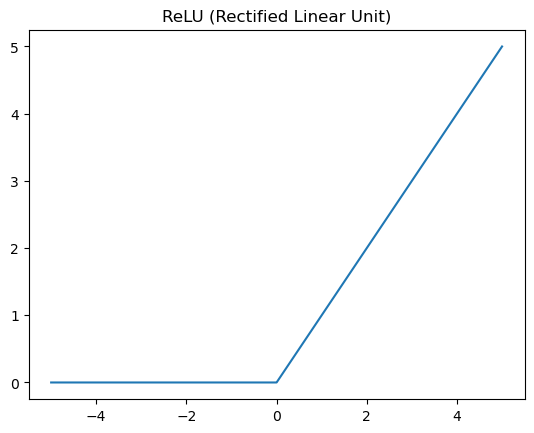

In [12]:
x=np.linspace(-5,5,2000)
y=x*(x>=0)
plt.plot(x,y)
plt.title("ReLU (Rectified Linear Unit)");

### softmax
$y_i=f_i(\vec{x})={\displaystyle \frac{e^{x_i}}{\sum_{j=1}^J e^{x_j}}}$
<br>$y_i\in[0,1]$
<br><br>${\displaystyle \frac{\partial y_i}{\partial x_j}=y_i(\delta_{ij}-y_j)}$


### Many more activation functions
[Check here](https://en.wikipedia.org/wiki/Activation_function)

In [14]:
x = [1, 2, 3]
y = np.exp(x) / np.sum(np.exp(x))
y

array([0.09003057, 0.24472847, 0.66524096])

## Some useful materials for better understanding NN
[Neural Networks, Manifolds, and Topology - Colah's blog](http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/)<br>
[How the backpropagation algorithm works - Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap2.html
)

In [ ]:
# define binary string generator
# use for loop to generate a 2**len list, turn it to set, then to list
def binary_string(length):
    whole_list = []
    for i in range(length):
        